# Plotting for Exploratory data analysis (EDA)
# Basic Terminology
## Haberman dataset

Dataset: [https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival]

* 2 types of people who had undergone surgery for breast cancer
* group 1: survived and group 2: died
* each person is defined by 3 features:
 1. Age of patient at time of operation (numerical) 
 2. Patient's year of operation (year - 1900, numerical) 
 3. Number of positive axillary nodes detected (numerical) 
 4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 yea
*  Objective: Classify a new patient whether he/she would survive given the 3 features.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
haberman = pd.read_csv("haberman.csv")


In [5]:
#how many data-points in the features
print(haberman.shape)


(306, 4)


In [6]:
#how many features are there 
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
#total classes in the dataset
print(haberman['status'].nunique())
print(haberman['status'].unique())

2
[1 2]


In [8]:
# A quick look of data
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
#how many data points for each class are present
haberman["status"].value_counts()

status
1    225
2     81
Name: count, dtype: int64

In [10]:
haberman['status'] = haberman["status"].map({1:'survived',2:'died'})

In [11]:
print(haberman['status'].unique())

['survived' 'died']


**Observation**
1. haberman is not a balanced dataset as the number of data points for one class is 81 and for 225 for the other class.

# 2-D Scatter Plot

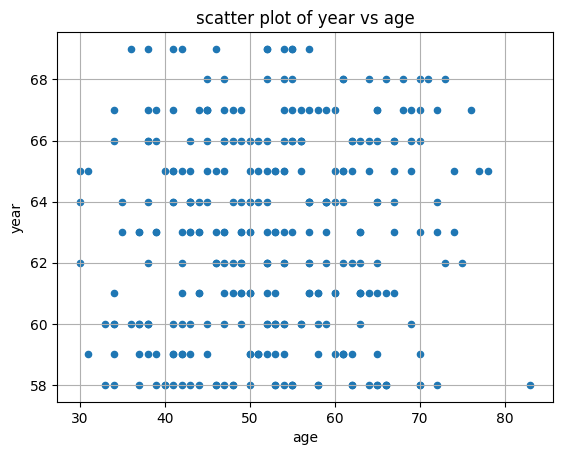

In [12]:
haberman.plot(kind='scatter',x='age',y='year')
plt.title('scatter plot of year vs age')
plt.grid("whitegrid")
plt.show()

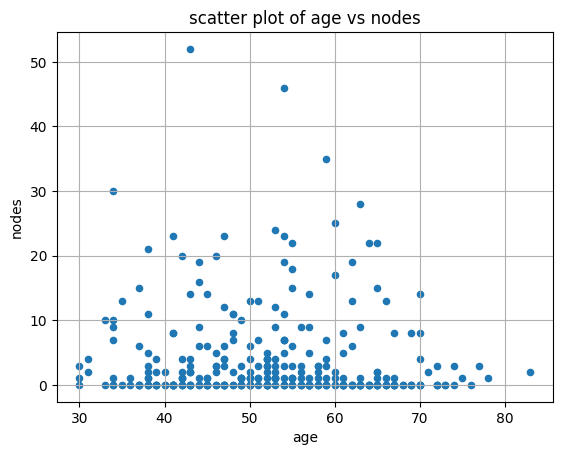

In [13]:
haberman.plot(kind='scatter',x='age',y='nodes')
plt.title("scatter plot of age vs nodes")
plt.grid("whitegrid")
plt.show()

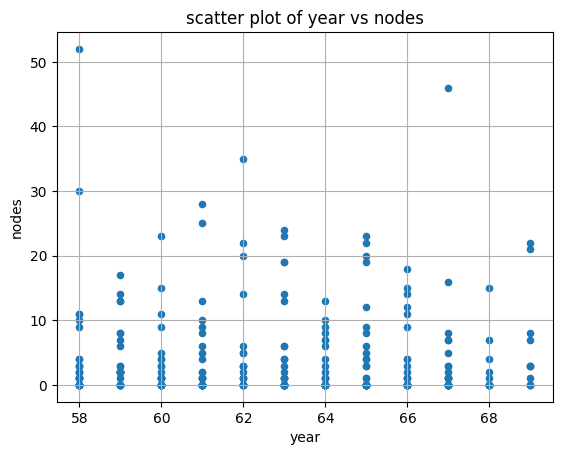

In [14]:
haberman.plot(kind='scatter',x='year',y='nodes')
plt.title("scatter plot of year vs nodes")
plt.grid("whitegrid")
plt.show()

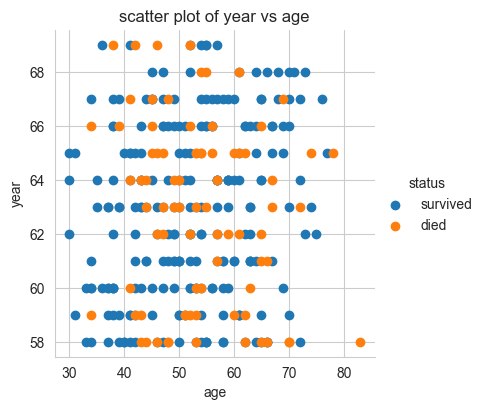

In [15]:
# 2-D Scatter plot with color-coding for each patient type/class.
 
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title('scatter plot of year vs age')
plt.show()

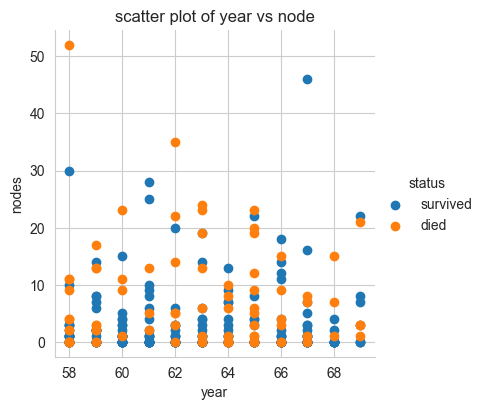

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",height=4).map(plt.scatter,"year","nodes").add_legend()
plt.title("scatter plot of year vs node")
plt.show()

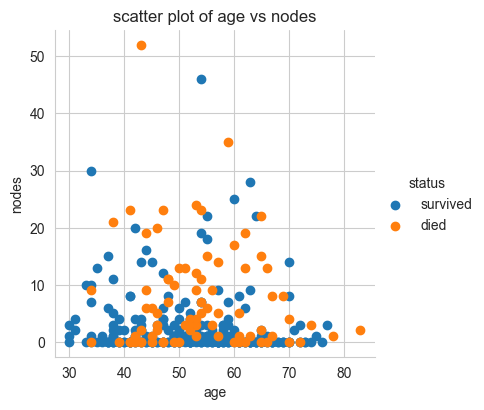

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',height=4).map(plt.scatter,"age","nodes").add_legend()
plt.title("scatter plot of age vs nodes")
plt.show()

# pair-plot

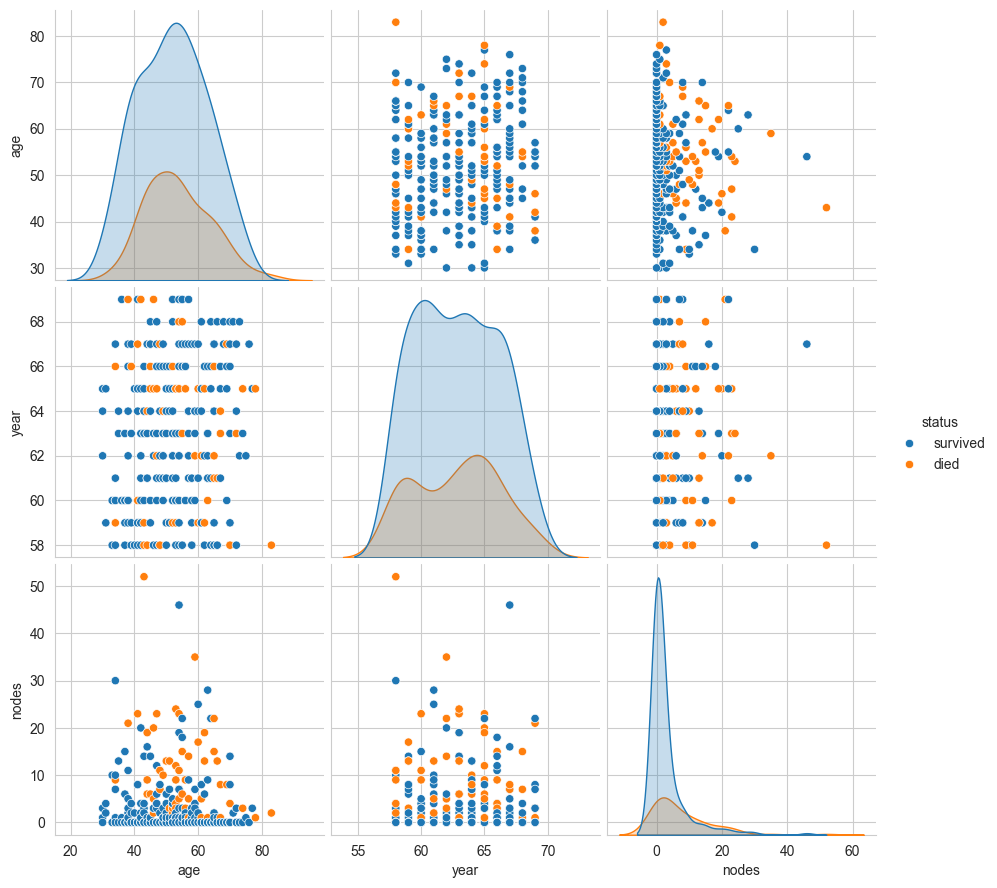

In [18]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='status',height=3)
plt.show()

**Observations**
1. based on age and year, the two classes are highly overlapped.
2. the degree of overlap is lower in the two classes based on nodes.
3. we might be able to use 'if-else' conditions to build a simple model to classify the patient types


# Histogram, PDF and CDF

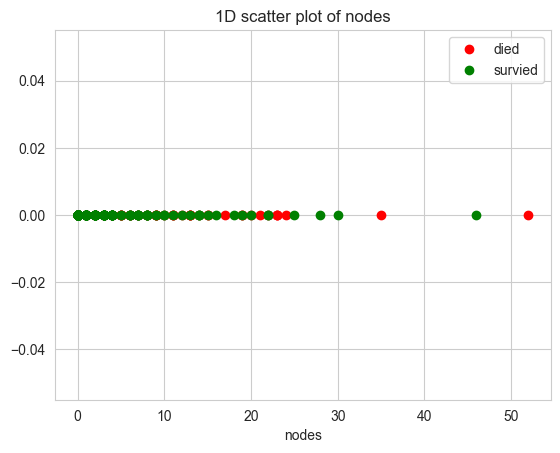

In [19]:
#1-D scatter plot of nodes
import numpy as np
haberman_survived = haberman.loc[haberman["status"] == 'survived']
haberman_died = haberman.loc[haberman["status"] == 'died']

plt.plot(haberman_died["nodes"], np.zeros_like(haberman_died['nodes']), 'ro', label='died')

plt.plot(haberman_survived["nodes"], np.zeros_like(haberman_survived['nodes']), 'go', label='survied')

plt.xlabel('nodes')
plt.title('1D scatter plot of nodes')
plt.legend()

plt.show()

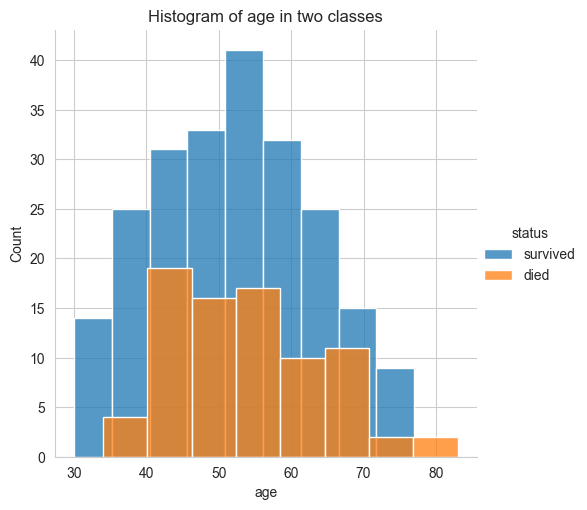

In [20]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.histplot,"age").add_legend()
plt.title("Histogram of age in two classes")
plt.show()

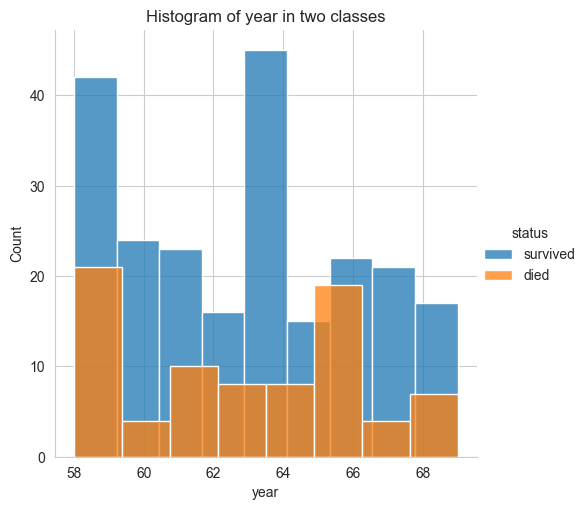

In [21]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.histplot,"year").add_legend()
plt.title("Histogram of year in two classes")
plt.show()

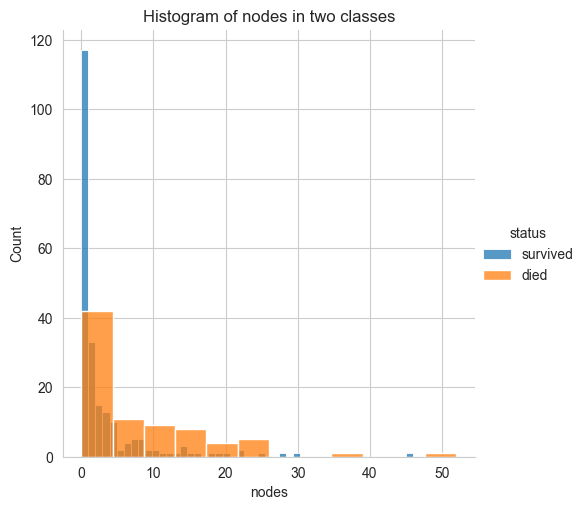

In [22]:
sns.FacetGrid(haberman,hue='status',height=5).map(sns.histplot,"nodes").add_legend()
plt.title("Histogram of nodes in two classes")
plt.show()

**Observations**
1. based on nodes we can say that if nodes are greater than 30 -> class 2 (died). we still have very small probability for class 1 but it is less than 5%.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


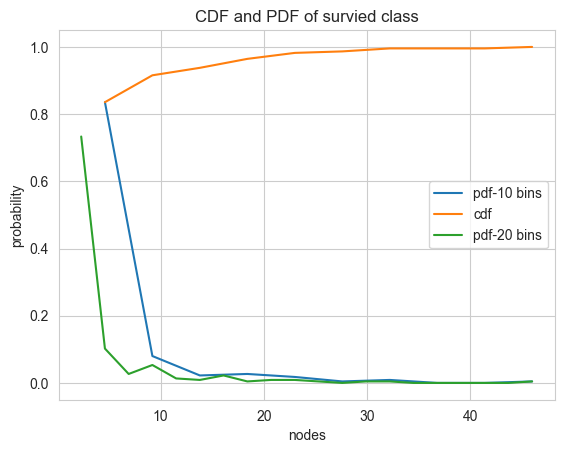

In [23]:
#Plot CDF of nodes who survied

counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-10 bins');
plt.plot(bin_edges[1:], cdf, label='cdf')


counts, bin_edges = np.histogram(haberman_survived['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='pdf-20 bins');
plt.title('CDF and PDF of survied class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


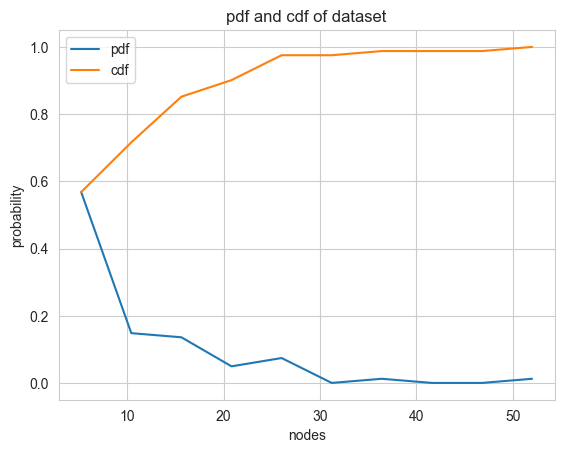

In [24]:
#plot CDF for nodes who died
counts, bin_edges = np.histogram(haberman_died['nodes'],bins = 10,density=True)
pdf = counts / (sum(counts))

print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.title('pdf and cdf of dataset')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


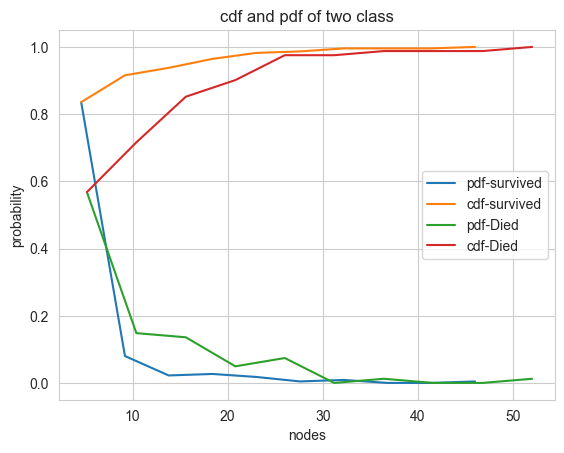

In [25]:
# plots of cdf of nodes of various type of patient

# who survived
counts,bin_edges = np.histogram(haberman_survived['nodes'],bins=10,density=True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-survived")
plt.plot(bin_edges[1:],cdf,label="cdf-survived")

# who Died

counts,bin_edges = np.histogram(haberman_died['nodes'],bins=10,density=True)
pdf = counts / (sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf-Died")
plt.plot(bin_edges[1:],cdf,label="cdf-Died")
plt.title("cdf and pdf of two class")
plt.legend()

plt.xlabel('nodes')
plt.ylabel('probability')
plt.show()

**Observations**
1. Based on above pdf and cdf graph corresponding to nodes, we can say that if the number of nodes are lesser than 5 then there is 82 % chances that is class 1(survive), whereas it still 58 % chances that belongs to class 2(Died).

# Mean,varience and std-deviation

In [26]:
# means
print("Mean:")
print("Survived class:-> ", np.mean(haberman_survived['nodes']))
print("Died class:-> ", np.mean(haberman_died['nodes']))

print("\nstd-dev:")
print("Survived class:-> ", np.std(haberman_survived['nodes']))
print("Died class:-> ", np.std(haberman_died['nodes']))





Mean:
Survived class:->  2.7911111111111113
Died class:->  7.45679012345679

std-dev:
Survived class:->  5.857258449412138
Died class:->  9.128776076761635


# Median, percentile, Quantile, IQR, MAD

In [27]:
print("median:")
print("Survived class:-> ",np.median(haberman_survived['nodes']))
print("Died class:-> ", np.median(haberman_died['nodes']))

print("\nQuantiles:")
print("Survived class:-> ",np.percentile(haberman_survived['nodes'],np.arange(0,100,25)))
print("Died class:-> ",np.percentile(haberman_died['nodes'],np.arange(0,100,25)))

print("\n90th percentile:")
print("Survived class:-> ",np.percentile(haberman_survived['nodes'],90))
print("Died class:-> ",np.percentile(haberman_died['nodes'],90))


from statsmodels import robust
print("\nMedian Absolute Deviation(MAD):")
print("Survived class:-> ",robust.mad(haberman_survived['nodes']))
print("Died class:-> ",robust.mad(haberman_died['nodes']))




median:
Survived class:->  0.0
Died class:->  4.0

Quantiles:
Survived class:->  [0. 0. 0. 3.]
Died class:->  [ 0.  1.  4. 11.]

90th percentile:
Survived class:->  8.0
Died class:->  20.0

Median Absolute Deviation(MAD):
Survived class:->  0.0
Died class:->  5.930408874022408


# Box plot and whiskers


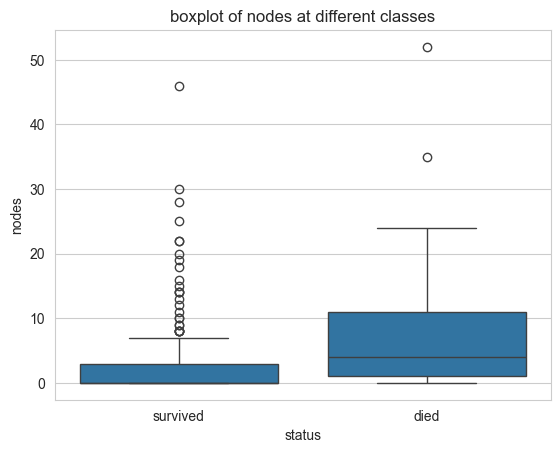

In [28]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title("boxplot of nodes at different classes")
plt.show()

# violin plot

C:\Users\thumm\AppData\Local\Temp\ipykernel_15108\751676482.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="status", y="nodes", data=haberman, palette=["lightblue", "lightgreen"])


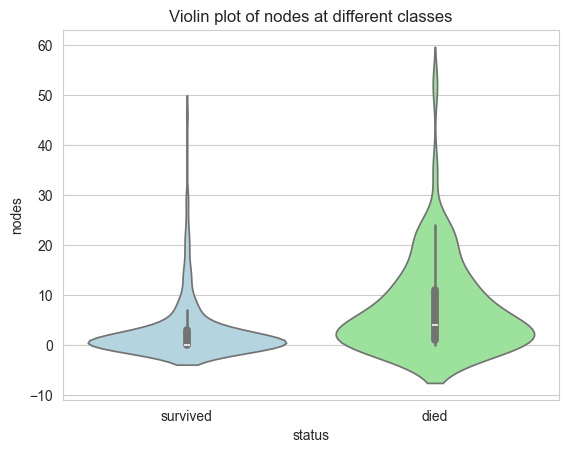

In [29]:
sns.violinplot(x="status", y="nodes", data=haberman, palette=["lightblue", "lightgreen"])
plt.title('Violin plot of nodes at different classes')
plt.show()

# summary
1. The given dataset is imbalanced as it does not contains equal number of data-points for each classes
2. There is no clear way to seperate the two classes based on the 3 features.
3. Based on "nodes" we are able to provide simple 'if-else' model to distinguish the 2 classes but it only works for large number of nodes or very small number of nodes.
4. As we can see from boxplot and the violinplot, the class 1(survived) is more dense in term of nodes. Most people who survived had 1-10 nodes.
5. on the other hand class 2 is more spread and the dead patient had nodes in a wide range.


# Multivariate probability density, contour plot

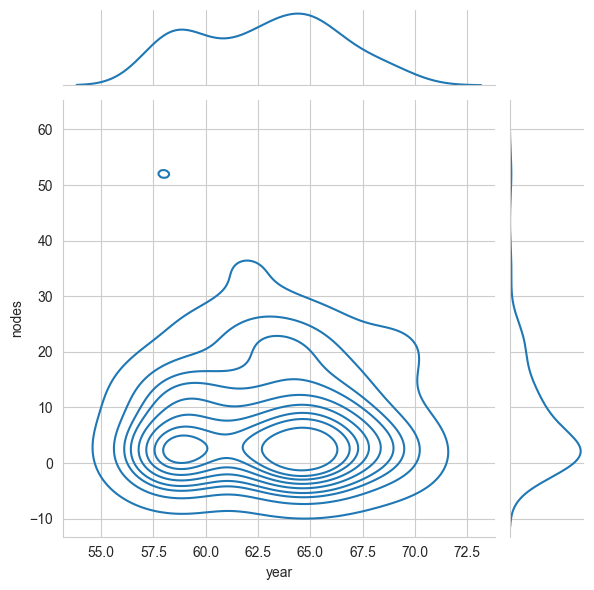

In [30]:
sns.jointplot(x="year",y="nodes",data=haberman_died,kind="kde")
plt.show()

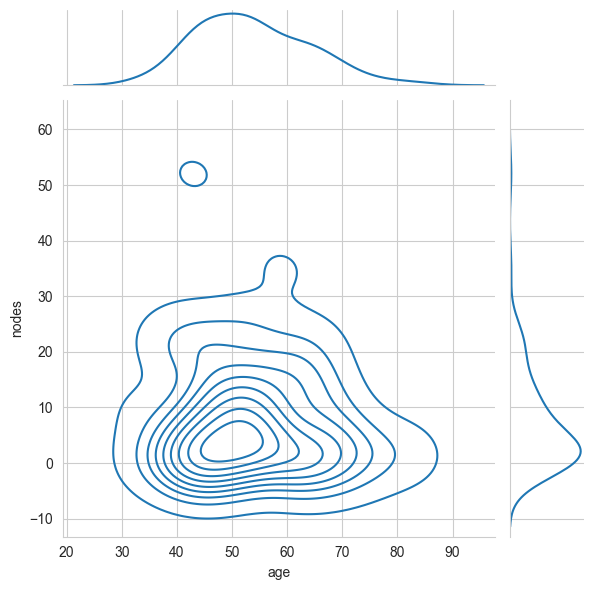

In [31]:
sns.jointplot(x="age",y="nodes",data=haberman_died,kind="kde")
plt.show()

**conclusion**
1. Number of nodes is the most predictive feature
   Age and year of operation have limited predictive value

2. Patients with <5 nodes have better survival chances
   Patients with >30 nodes have very poor prognosis

3. Dataset is relatively small
   Limited features available
   Significant overlap between classes makes perfect separation impossible